# 2D Fourier transforms
http://www.robots.ox.ac.uk/~az/lectures/ia/lect2.pdf

# F domain to S domain

频谱面上一点代表一个正余弦信号

[如何理解 图像傅里叶变换的频谱图](https://blog.csdn.net/ViatorSun/article/details/8238785)

In [6]:
from scipy.fftpack import ifftn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.simplefilter('ignore')

In [7]:
def IFFT(X1,X2,X3):
    f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row',figsize=(10,6))
    Z = ifftn(X1)
    ax1.imshow(X1, cmap=cm.Reds)
    ax4.imshow(np.real(Z), cmap=cm.gray)
    Z = ifftn(X2)
    ax2.imshow(X2, cmap=cm.Reds)
    ax5.imshow(np.real(Z), cmap=cm.gray)
    Z = ifftn(X3)
    ax3.imshow(X3, cmap=cm.Reds)
    ax6.imshow(np.real(Z), cmap=cm.gray)
    plt.show()

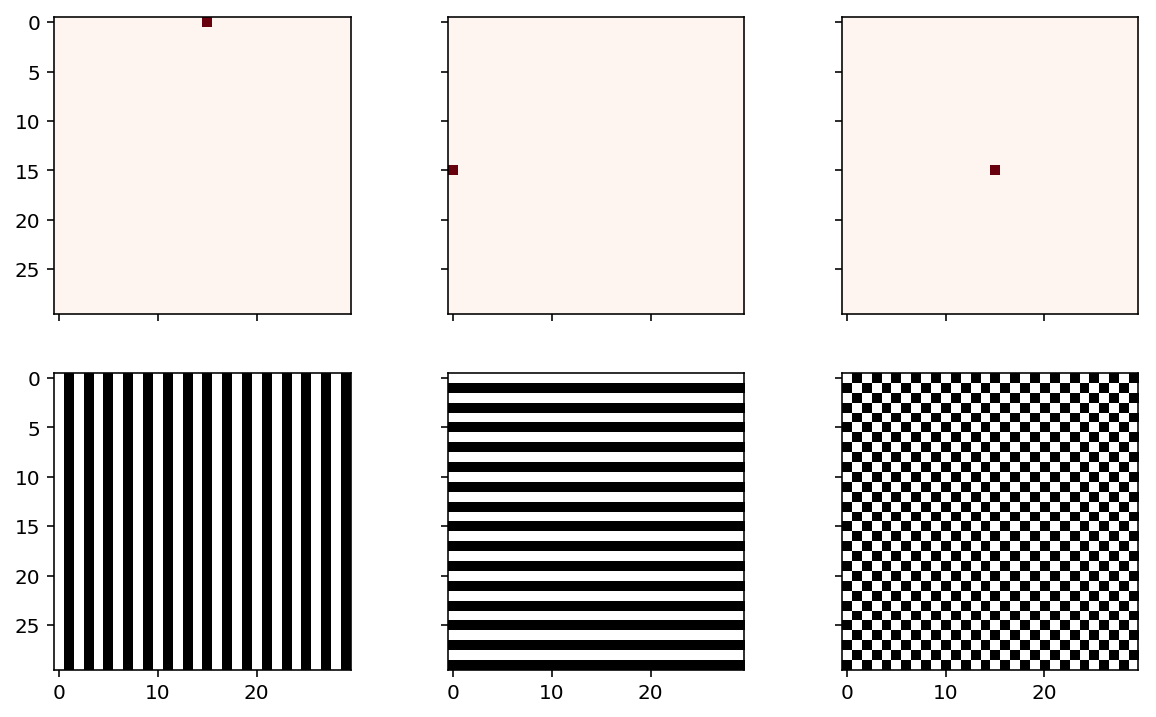

In [12]:
X1 = np.zeros((30,30))
X1[0, 15] = 1
X2 = np.zeros((30,30))
X2[15, 0] = 1
X3 = np.zeros((30,30))
X3[15, 15] = 1
IFFT(X1,X2,X3)

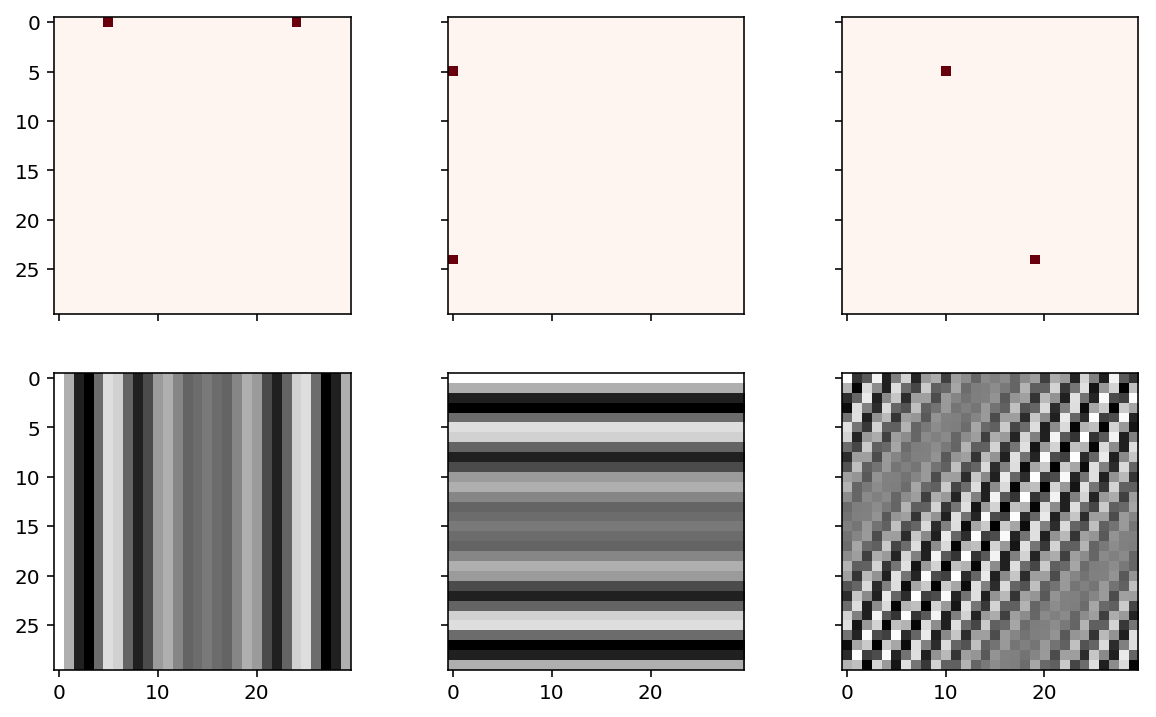

In [4]:
X1 = np.zeros((30,30))
X1[0, 5] = 1
X1[0, 24] = 1
X2 = np.zeros((30,30))
X2[5, 0] = 1
X2[24, 0] = 1
X3 = np.zeros((30,30))
X3[5, 10] = 1
X3[24, 19] = 1
IFFT(X1,X2,X3)

**频谱中心化以后，越靠近中心，频率越低**

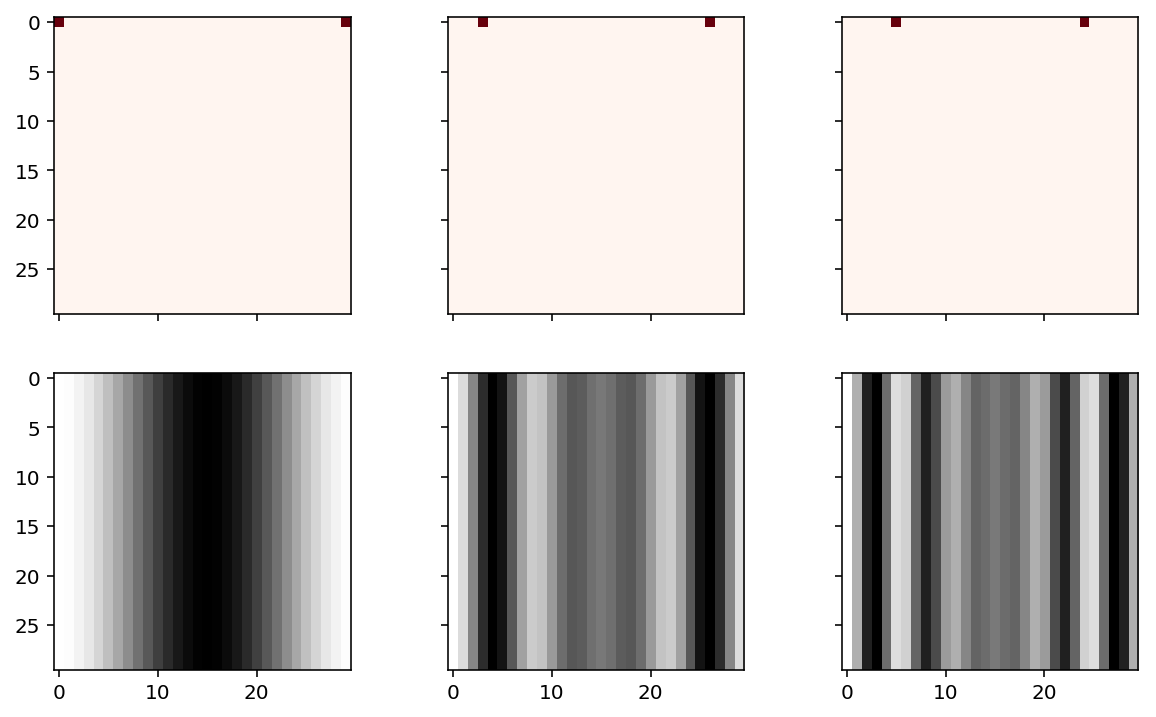

In [5]:
X1 = np.zeros((30,30))
X1[0, 0] = 1
X1[0, 29] = 1
X2 = np.zeros((30,30))
X2[0, 3] = 1
X2[0, 26] = 1
X3 = np.zeros((30,30))
X3[0, 5] = 1
X3[0, 24] = 1
IFFT(X1,X2,X3)

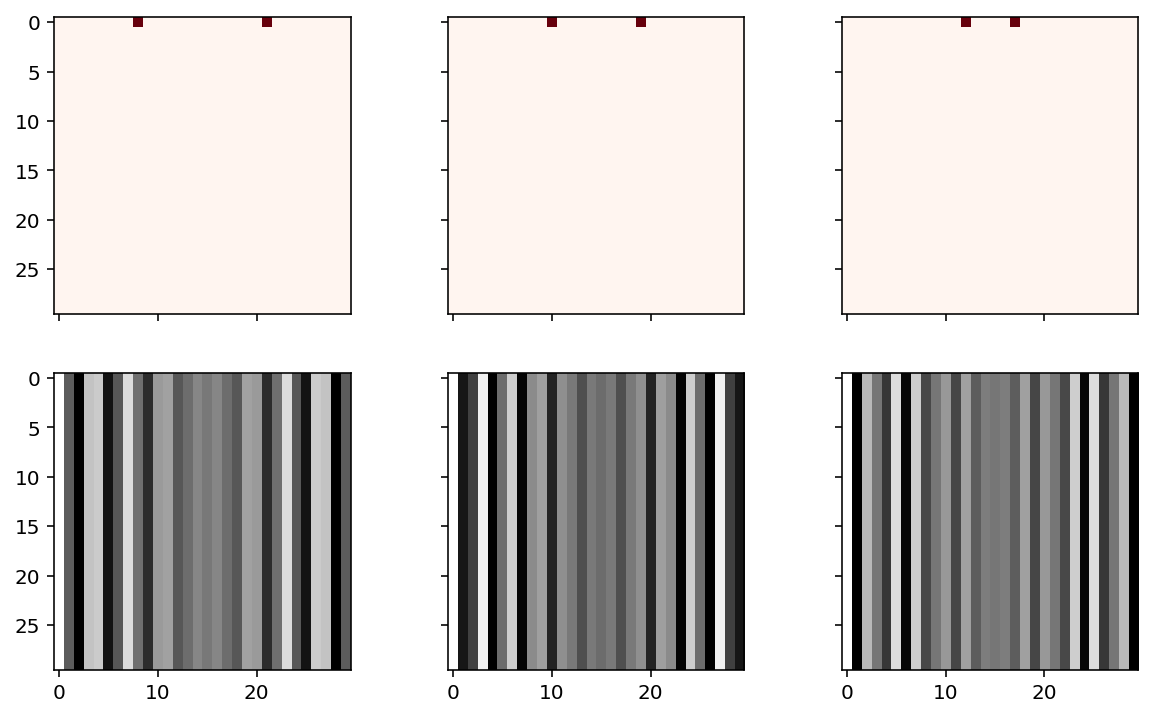

In [6]:
X1 = np.zeros((30,30))
X1[0, 8] = 1
X1[0, 21] = 1
X2 = np.zeros((30,30))
X2[0, 10] = 1
X2[0, 19] = 1
X3 = np.zeros((30,30))
X3[0, 12] = 1
X3[0, 17] = 1
IFFT(X1,X2,X3)

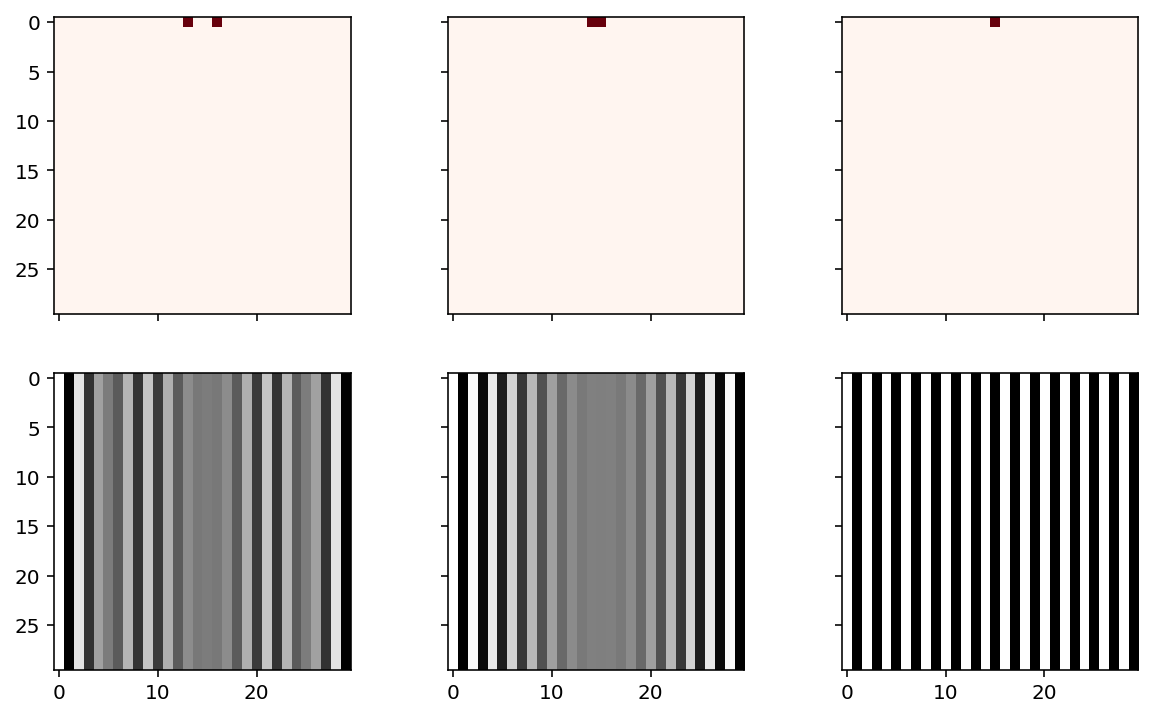

In [7]:
X1 = np.zeros((30,30))
X1[0, 13] = 1
X1[0, 16] = 1
X2 = np.zeros((30,30))
X2[0, 14] = 1
X2[0, 15] = 1
X3 = np.zeros((30,30))
X3[0, 15] = 1
X3[0, 15] = 1
IFFT(X1,X2,X3)

# S domain to F domain (光学傅立叶变换 Fourier optics)

In [8]:
import numpy as np
from scipy.fftpack import fftn
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.simplefilter('ignore')

In [2]:
def FFT(img):
    plt.figure(figsize=(10,8))
    plt.subplot(121),plt.imshow(img, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    f = (abs(np.fft.fftshift(fftn(img))))**0.25*(255)**3  # Amplify
    plt.subplot(122),plt.imshow(f, cmap = 'gray')
    plt.title('Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show()

## 狭缝衍射（光栅衍射）

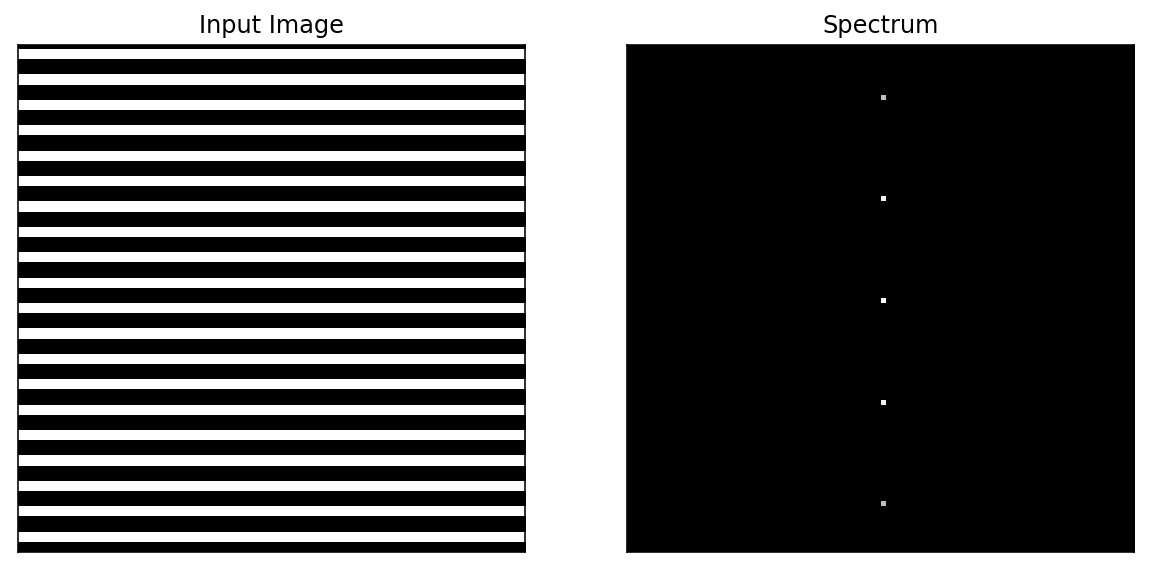

In [3]:
img = np.ones((100,100))
N = 5
for i in range(0,100,N):
    for j in range(-N//4,N//4):
        img[i+j] = [0]*100
FFT(img)

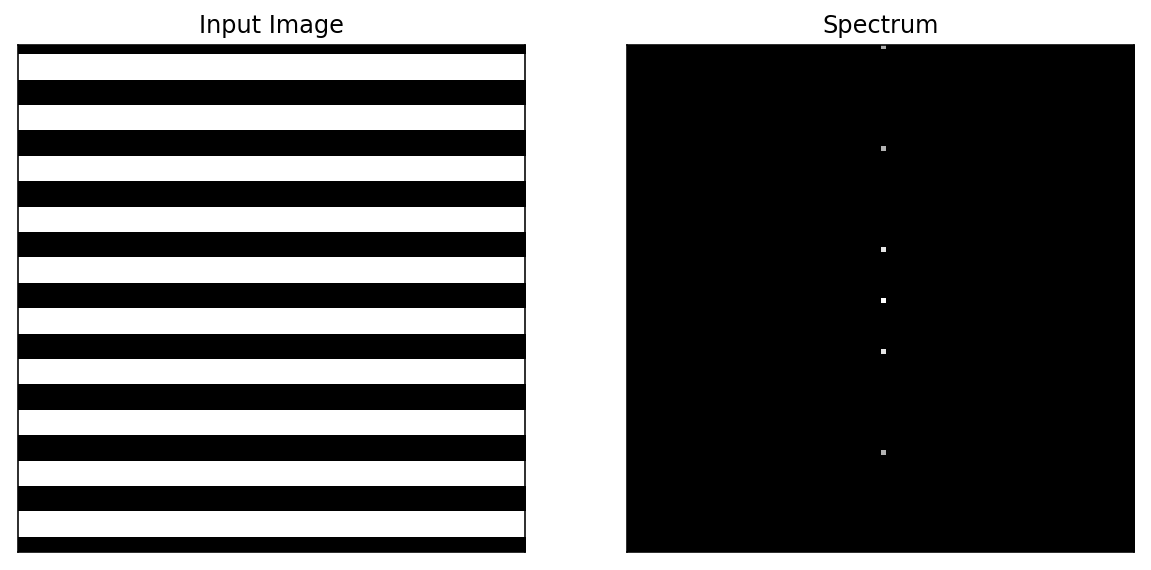

In [4]:
img = np.ones((100,100))
N = 10
for i in range(0,100,N):
    for j in range(-N//4,N//4):
        img[i+j] = [0]*100
FFT(img)

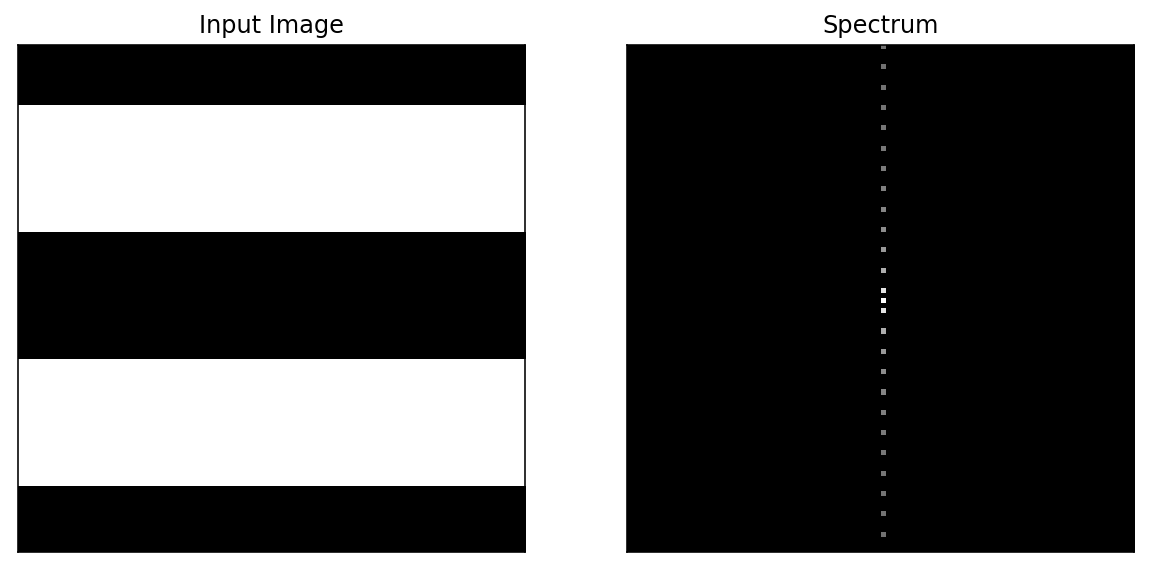

In [5]:
img = np.ones((100,100))
N = 50
for i in range(0,100,N):
    for j in range(-N//4,N//4):
        img[i+j] = [0]*100
FFT(img)

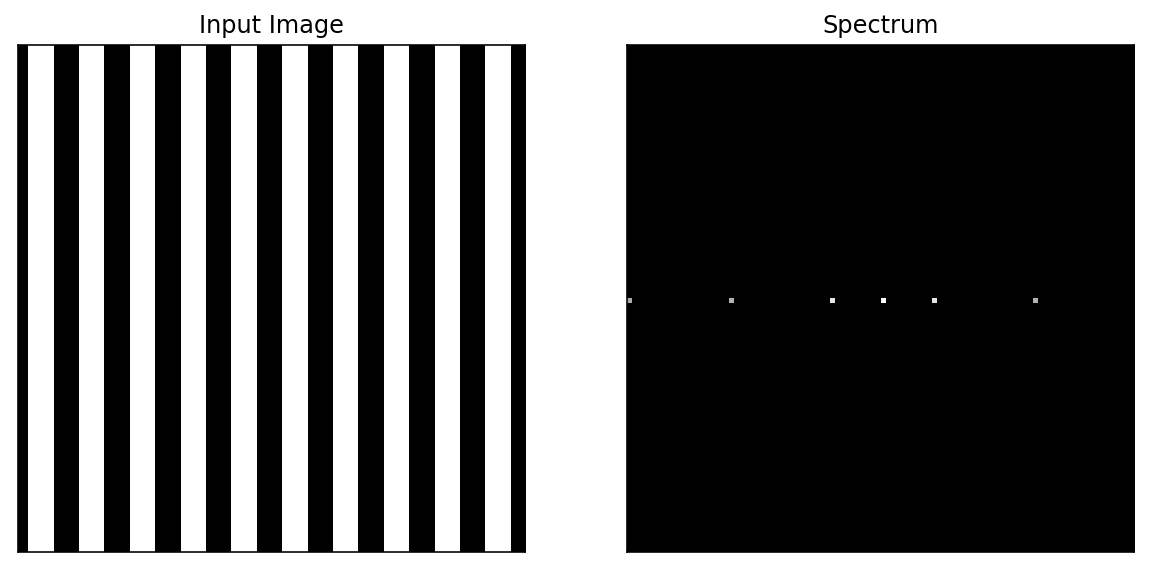

In [6]:
img = np.ones((100,100))
N = 10
for i in range(0,100,N):
    for j in range(-N//4,N//4):
        img[i+j] = [0]*100
img = np.array(img).transpose()
FFT(img)

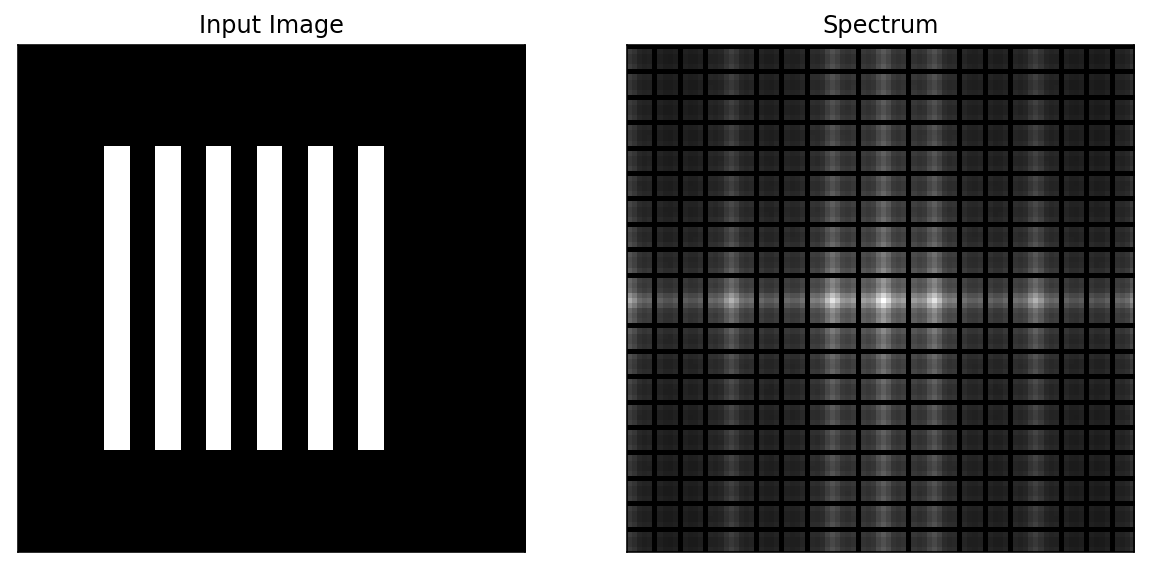

In [36]:
img = np.zeros((100,100))
N = 10
for i in range(20,80,N):
    for j in range(-N//4,N//4):
        img[i+j][20:80] = [1]*60
img = np.array(img).transpose()
FFT(img)

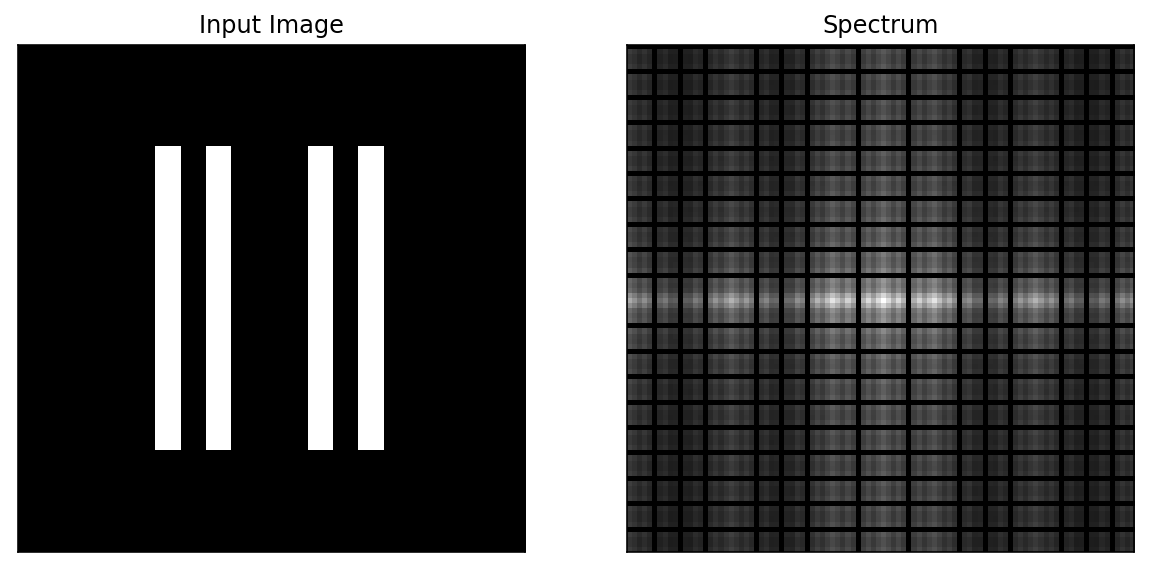

In [40]:
img = np.zeros((100,100))
N = 10
for i in range(30,80,N):
    if i == 50 :
        pass
    else:
        for j in range(-N//4,N//4):
            img[i+j][20:80] = [1]*60
img = np.array(img).transpose()
FFT(img)

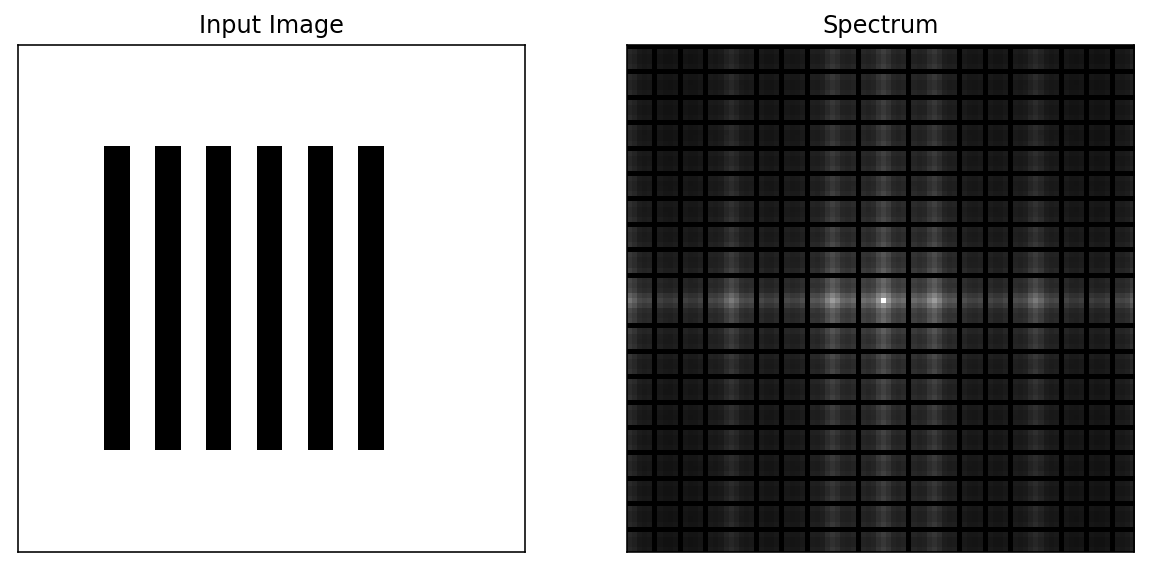

In [7]:
img = np.ones((100,100))
N = 10
for i in range(20,80,N):
    for j in range(-N//4,N//4):
        img[i+j][20:80] = [0]*60
img = np.array(img).transpose()
FFT(img)

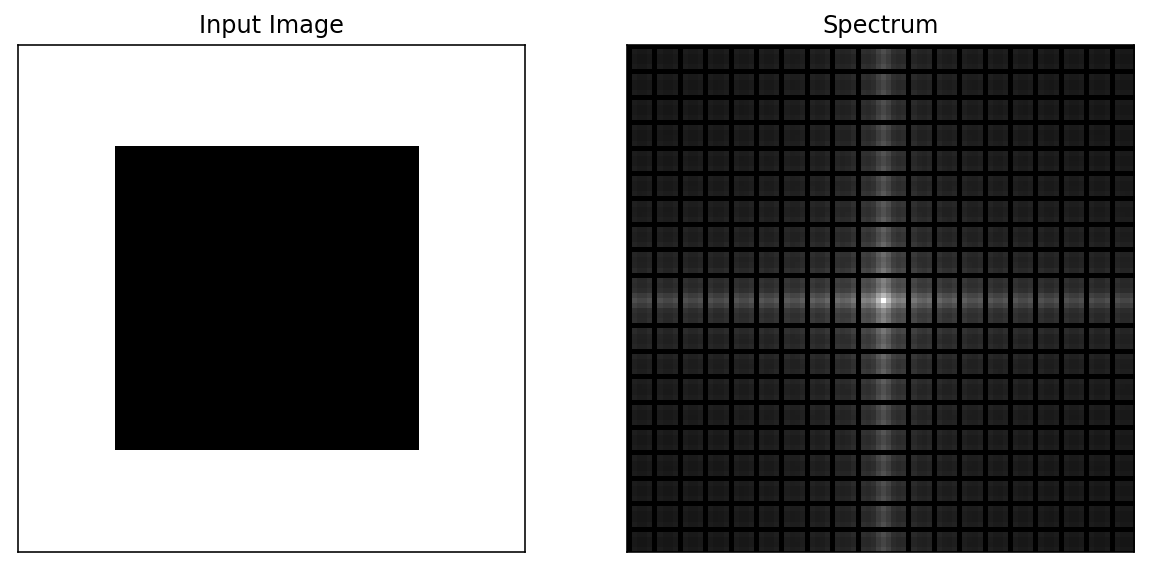

In [8]:
img = np.ones((100,100))
N = 1
for i in range(20,80,N):
    for j in range(-N//4,N//4):
        img[i+j][20:80] = [0]*60
img = np.array(img).transpose()
FFT(img)

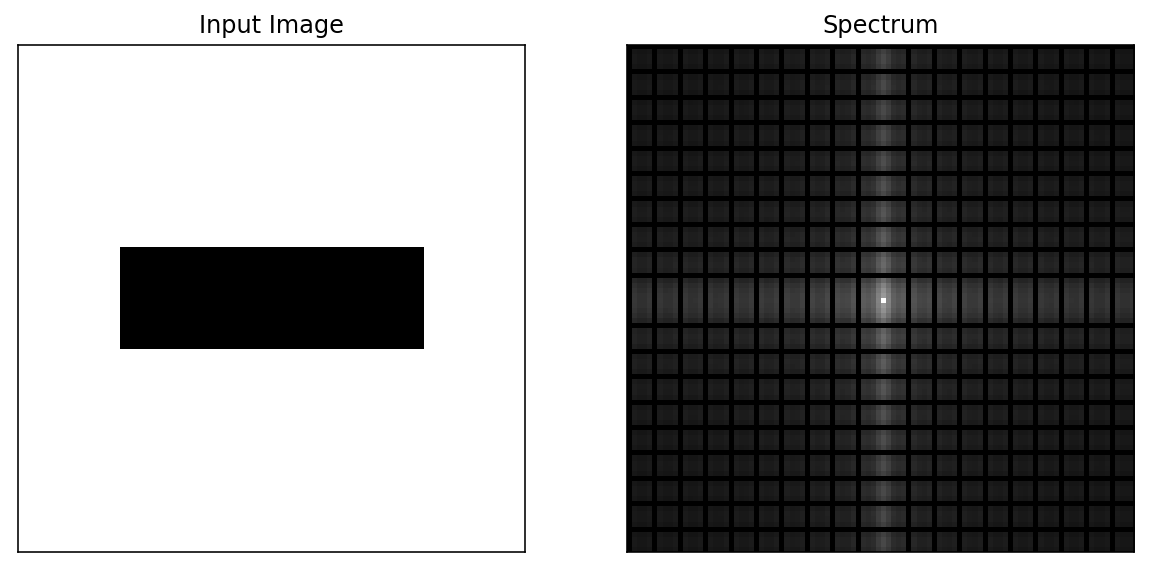

In [9]:
img = np.ones((100,100))
for i in range(20,80):
    for j in range(40,60):
        img[i][j] = 0
img = np.array(img).transpose()
FFT(img)

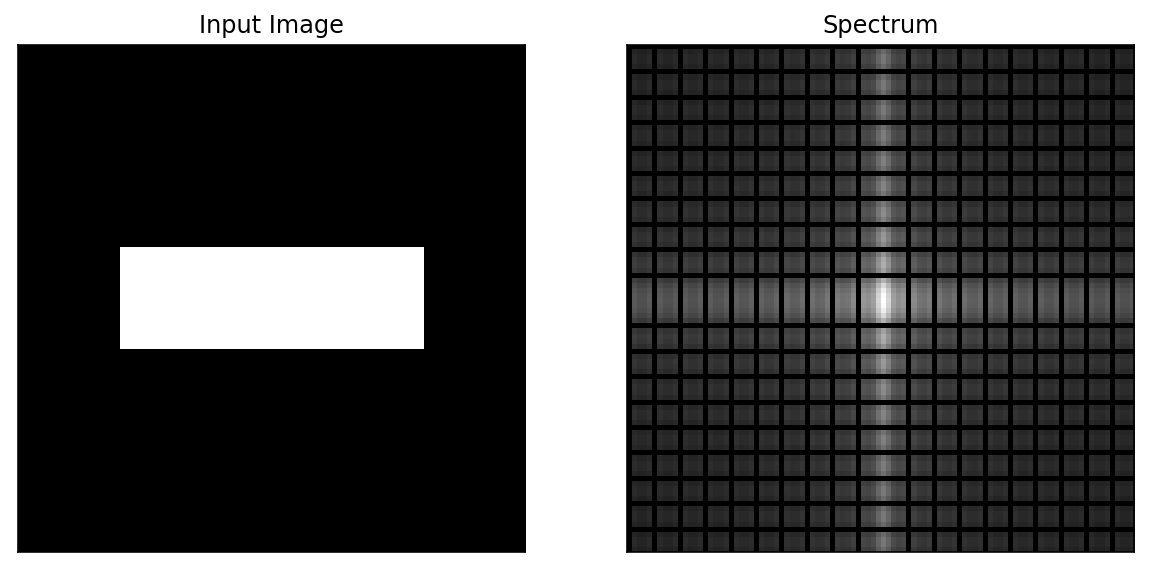

In [10]:
img = np.zeros((100,100))
for i in range(20,80):
    for j in range(40,60):
        img[i][j] = 1
img = np.array(img).transpose()
FFT(img)

## 平移不变

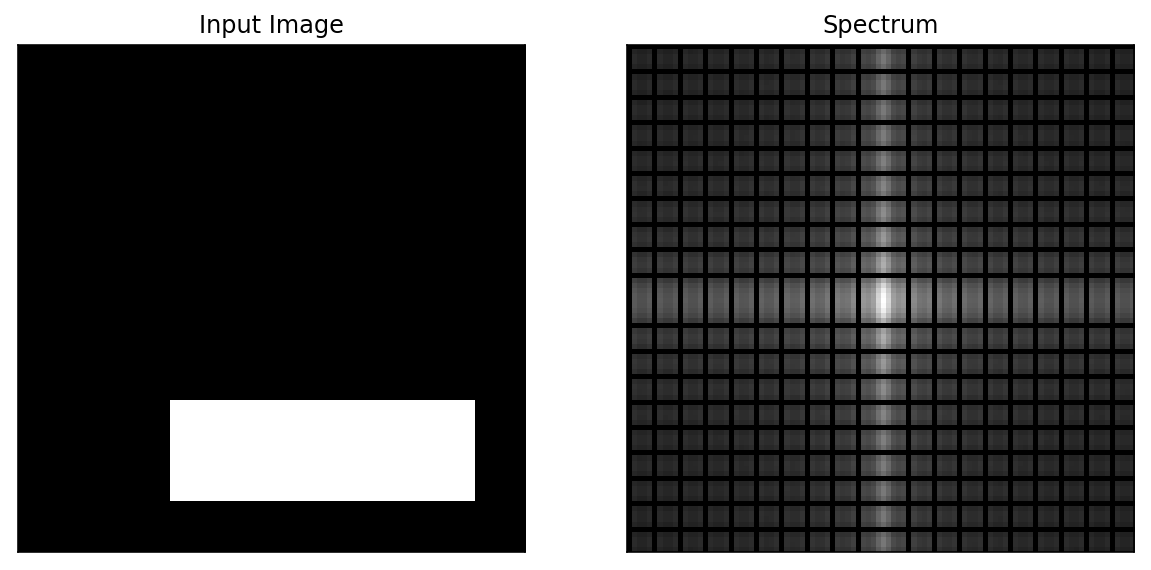

In [11]:
img = np.zeros((100,100))
for i in range(30,90):
    for j in range(70,90):
        img[i][j] = 1
img = np.array(img).transpose()
FFT(img)

## 双孔衍射

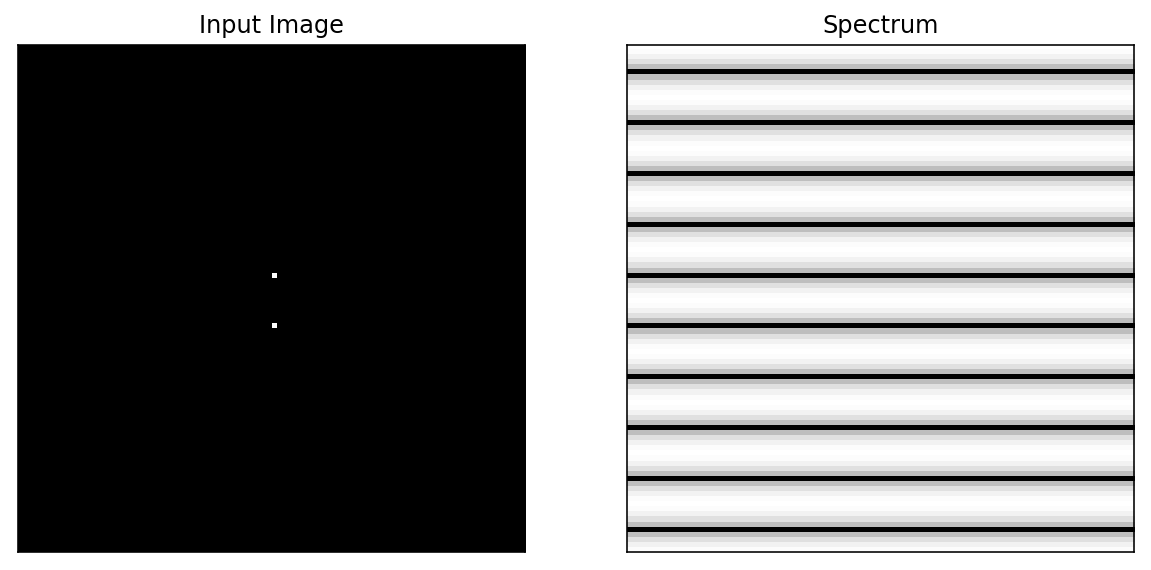

In [12]:
img = np.zeros((100,100))
img[50][45] = 1
img[50][55] = 1
img = np.array(img).transpose()
FFT(img)

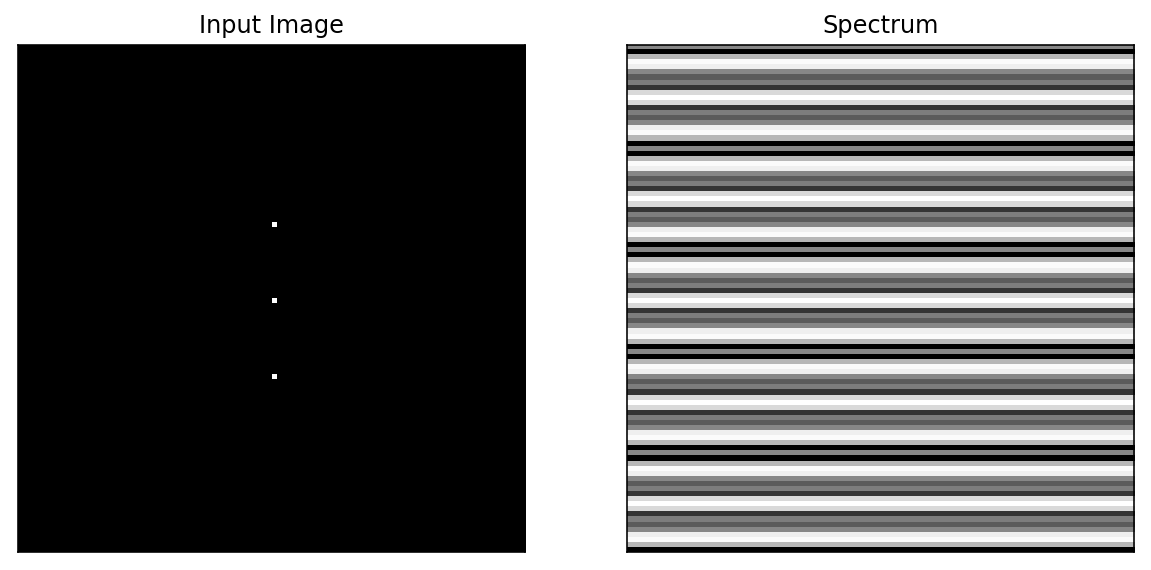

In [35]:
img = np.zeros((100,100))
img[50][35] = 1
img[50][50] = 1
img[50][65] = 1
img = np.array(img).transpose()
FFT(img)

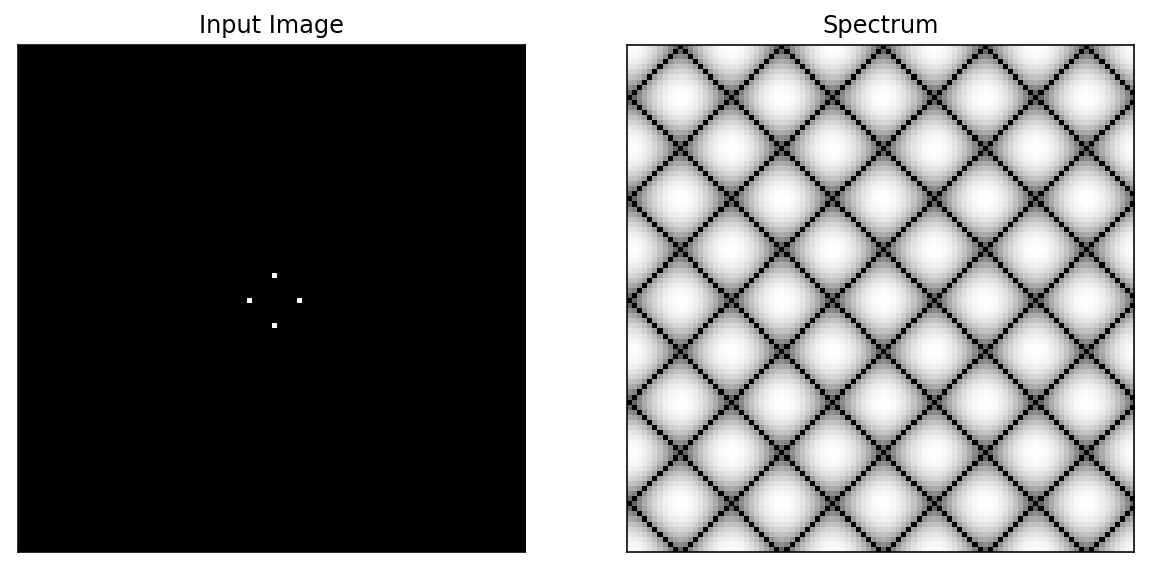

In [13]:
img = np.zeros((100,100))
img[50][45] = 1
img[50][55] = 1
img[45][50] = 1
img[55][50] = 1
img = np.array(img).transpose()
FFT(img)

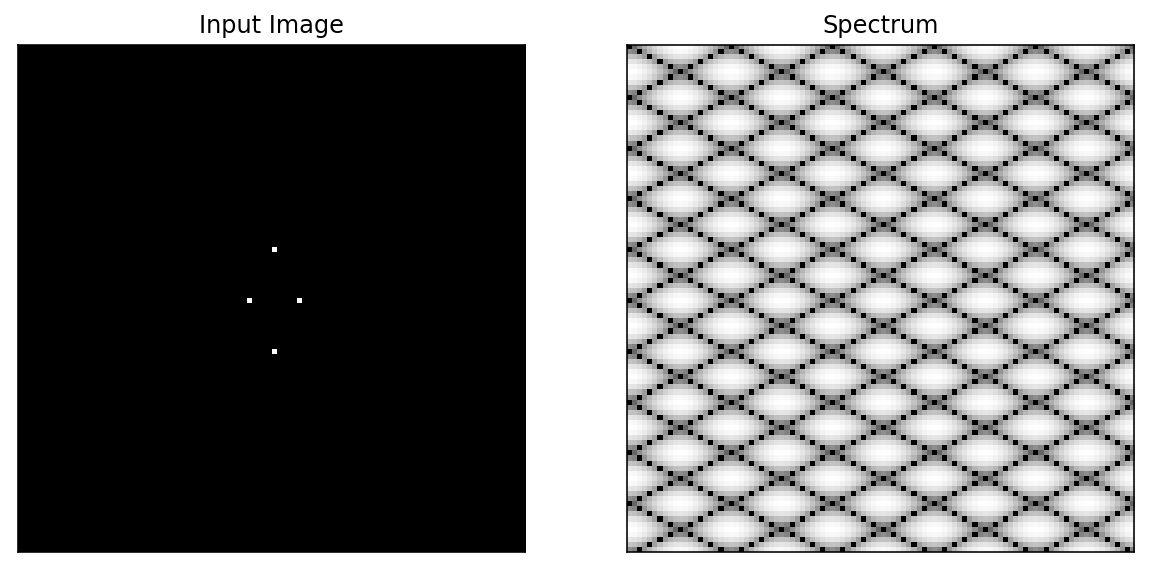

In [34]:
img = np.zeros((100,100))
img[50][40] = 1
img[50][60] = 1
img[45][50] = 1
img[55][50] = 1
img = np.array(img).transpose()
FFT(img)

## 网格衍射

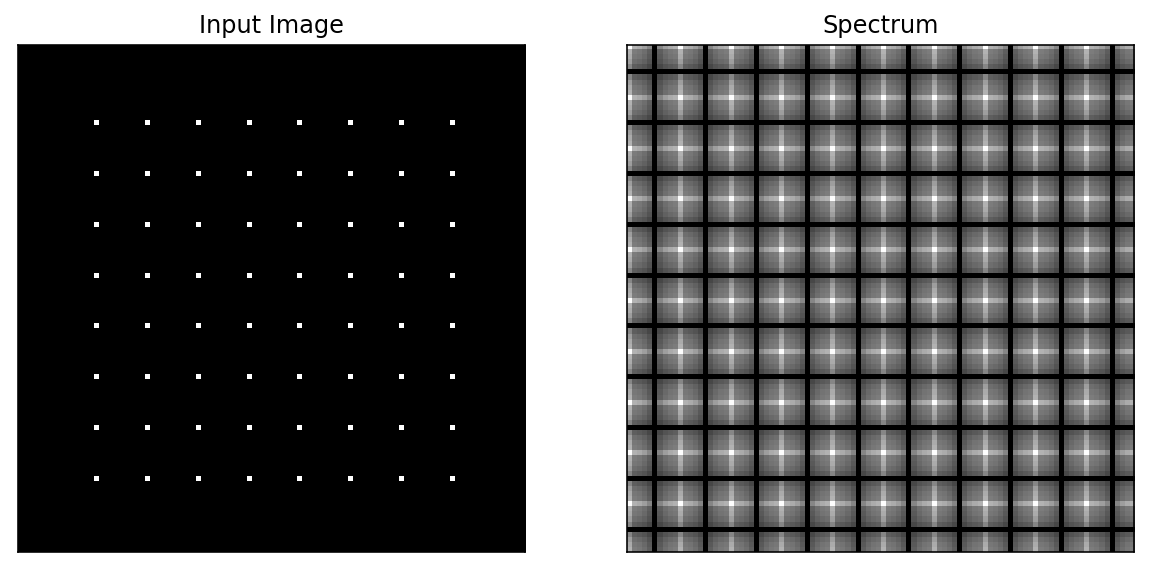

In [14]:
img = np.zeros((100,100))
for i in range(15,90,10):
    for j in range(15,90,10):
        img[i][j] = 1
img = np.array(img).transpose()
FFT(img)

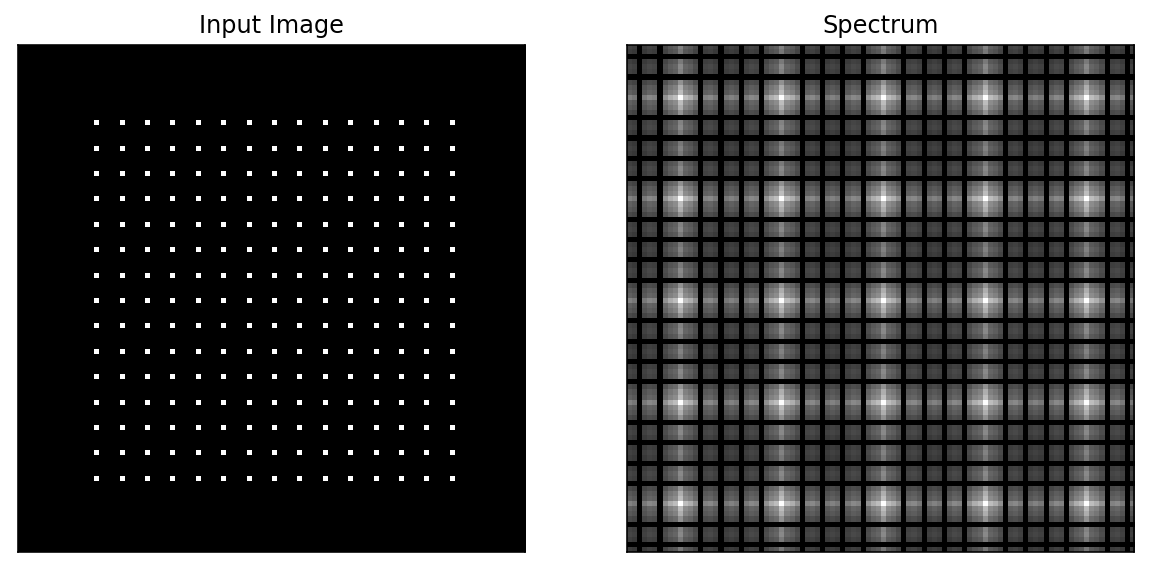

In [15]:
img = np.zeros((100,100))
for i in range(15,90,5):
    for j in range(15,90,5):
        img[i][j] = 1
img = np.array(img).transpose()
FFT(img)

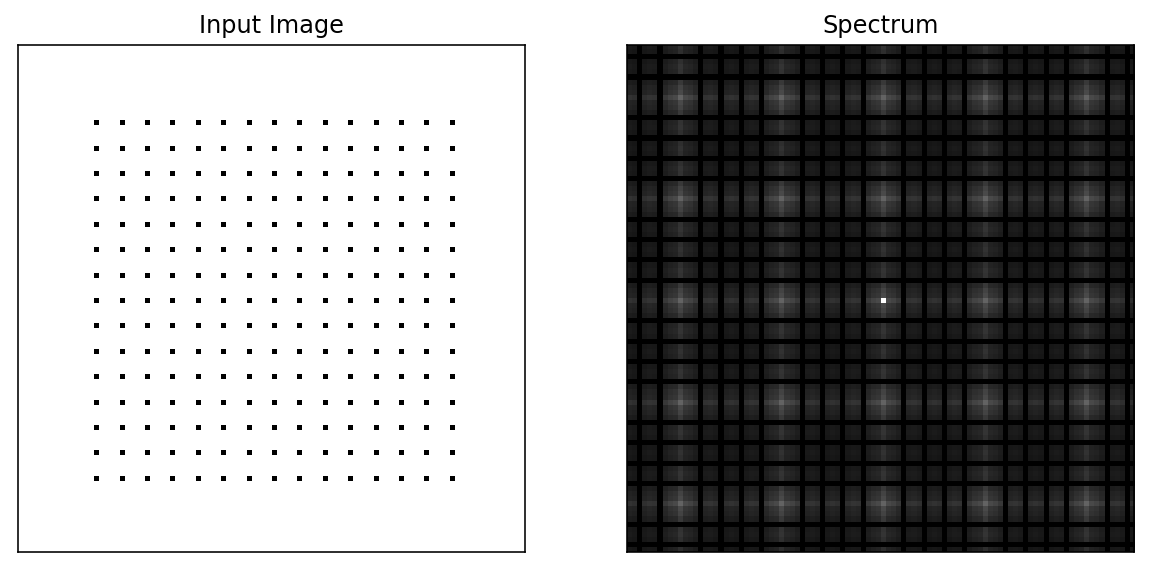

In [16]:
img = np.ones((100,100))
for i in range(15,90,5):
    for j in range(15,90,5):
        img[i][j] = 0
img = np.array(img).transpose()
FFT(img)

## 圆孔衍射（近似）

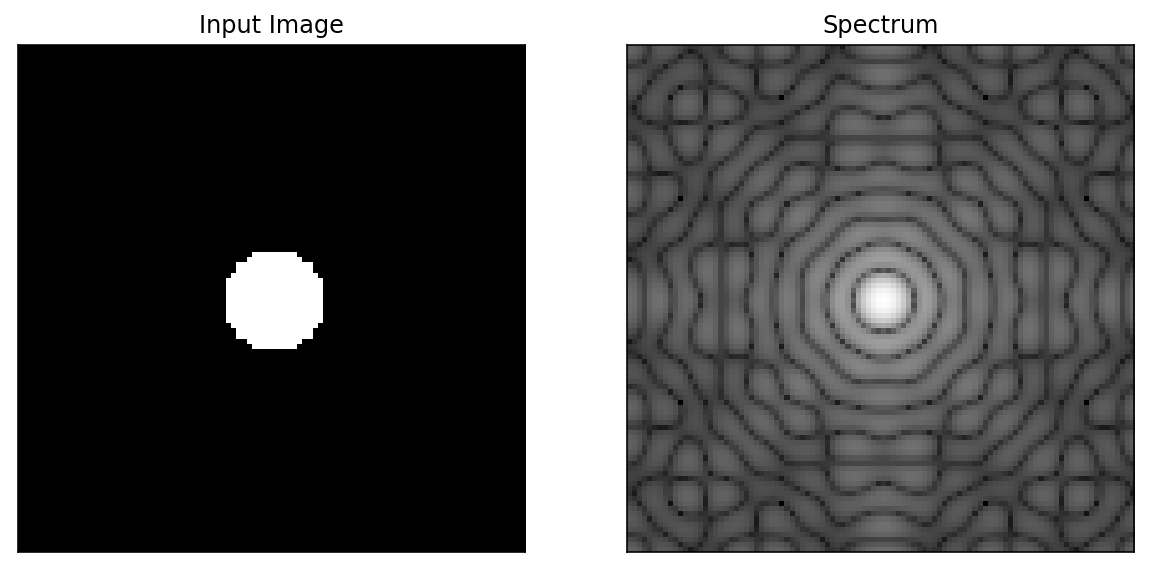

In [17]:
cx,cy,r = 50,50,10
x = np.arange(0, 100)
y = np.arange(0, 100)
img = np.zeros((y.size, x.size))
mask = (x[np.newaxis,:]-cx)**2 + (y[:,np.newaxis]-cy)**2 < r**2
img[mask] = 1
img = np.array(img).transpose()
FFT(img)

## 圆屏衍射（近似）

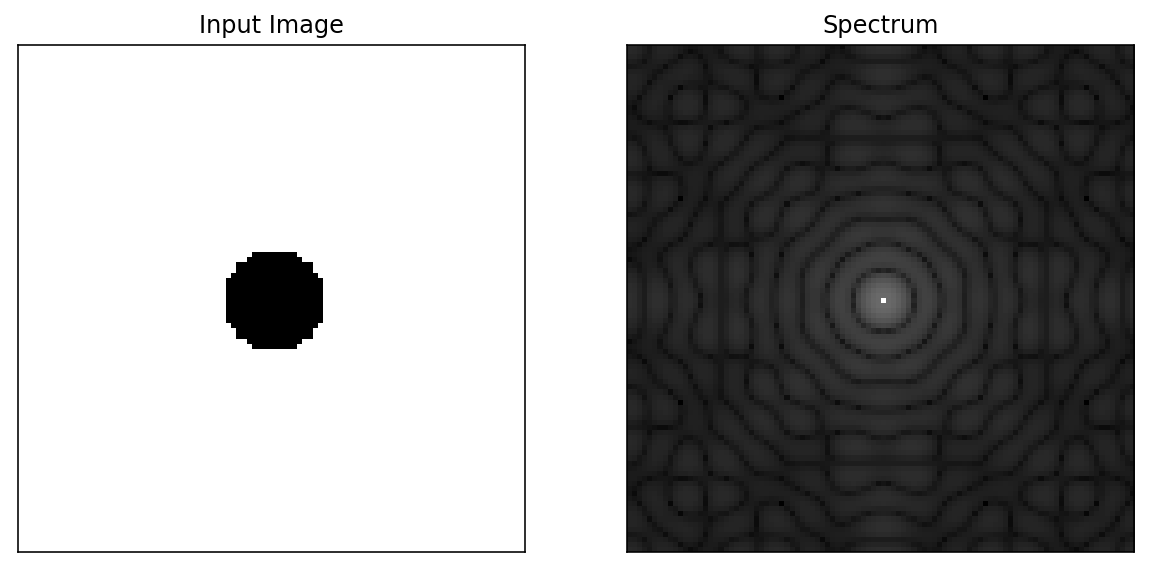

In [18]:
cx,cy,r = 50,50,10
x = np.arange(0, 100)
y = np.arange(0, 100)
img = np.ones((y.size, x.size))
mask = (x[np.newaxis,:]-cx)**2 + (y[:,np.newaxis]-cy)**2 < r**2
img[mask] = 0
img = np.array(img).transpose()
FFT(img)

## 菲涅尔波带片

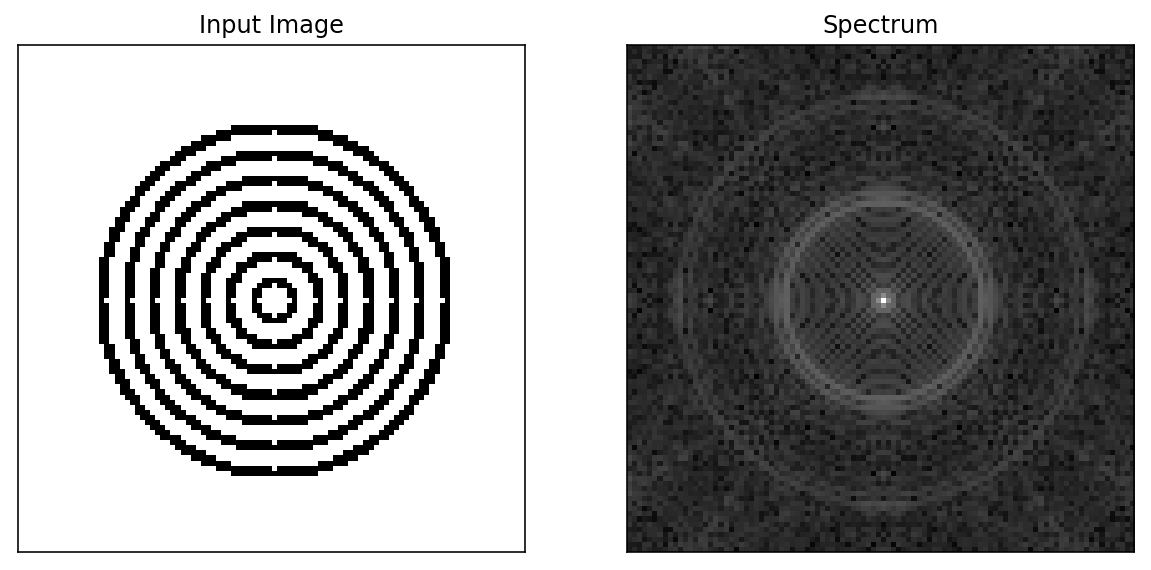

In [19]:
cx,cy = 50,50
x = np.arange(0, 100)
y = np.arange(0, 100)
img = np.ones((y.size, x.size))
for r in range(5,40,5):
    mask = ((x[np.newaxis,:]-cx)**2 + (y[:,np.newaxis]-cy)**2 < r**2) & ((x[np.newaxis,:]-cx)**2 + (y[:,np.newaxis]-cy)**2 > (r-2)**2)
    img[mask] = 0
img = np.array(img).transpose()
FFT(img)

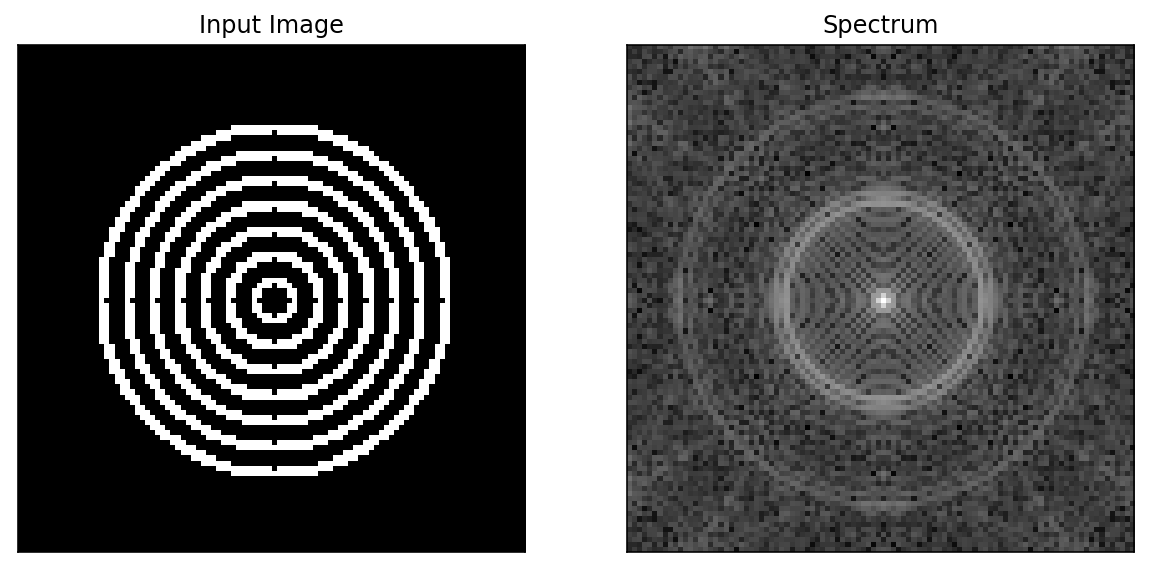

In [20]:
cx,cy = 50,50
x = np.arange(0, 100)
y = np.arange(0, 100)
img = np.zeros((y.size, x.size))
for r in range(5,40,5):
    mask = ((x[np.newaxis,:]-cx)**2 + (y[:,np.newaxis]-cy)**2 < r**2) & ((x[np.newaxis,:]-cx)**2 + (y[:,np.newaxis]-cy)**2 > (r-2)**2)
    img[mask] = 1
img = np.array(img).transpose()
FFT(img)

## 三角形衍射

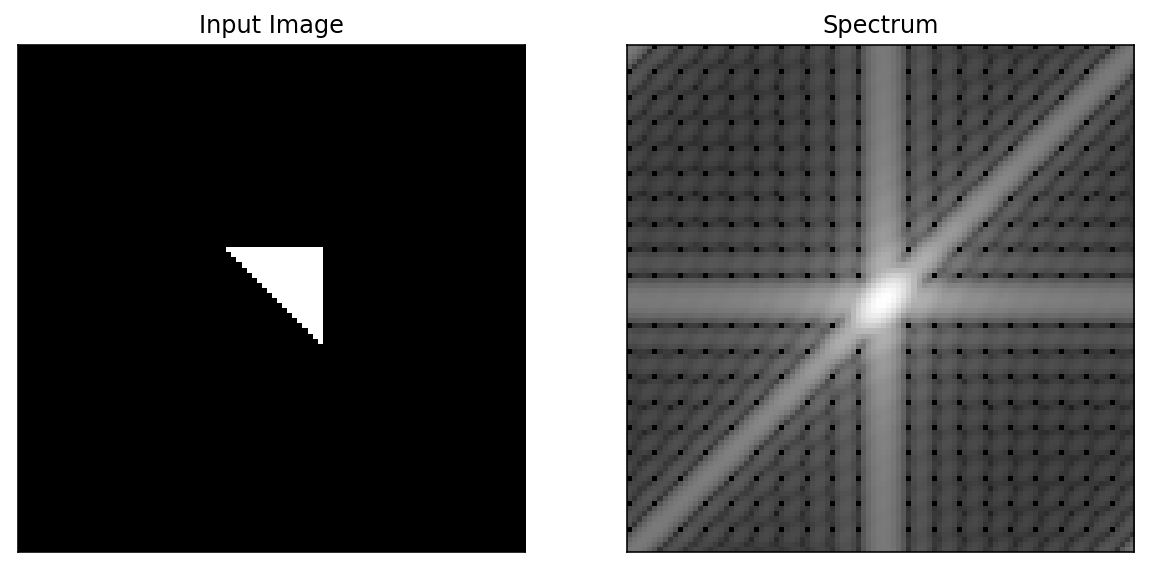

In [21]:
img = np.zeros((100,100))
for i in range(40,60):
    for j in range(40,i):
        img[i][j] = 1
img = np.array(img).transpose()
FFT(img)

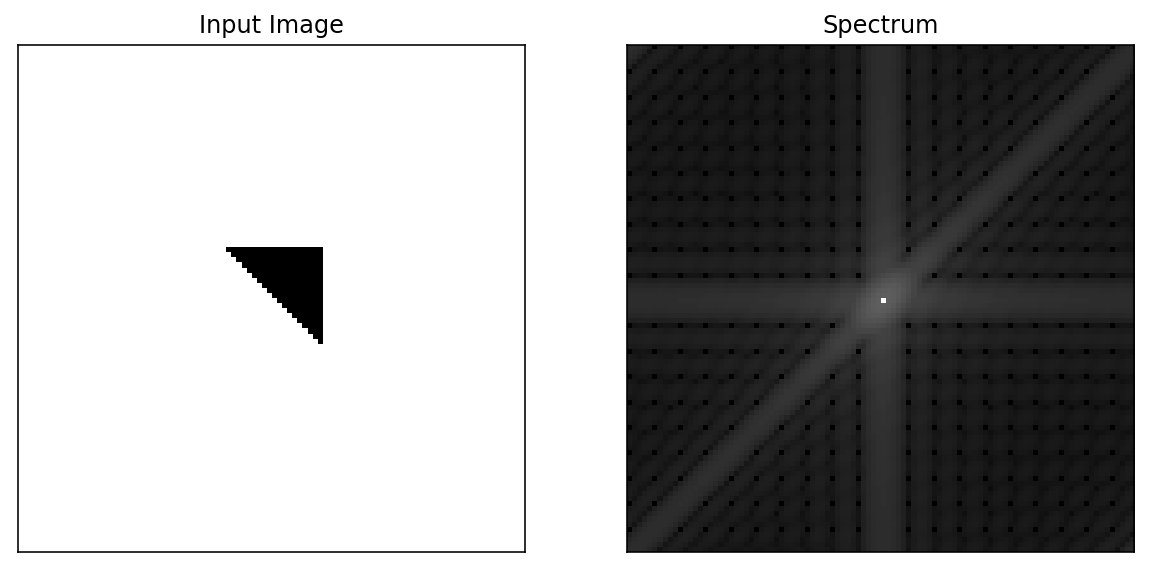

In [22]:
img = np.ones((100,100))
for i in range(40,60):
    for j in range(40,i):
        img[i][j] = 0
img = np.array(img).transpose()
FFT(img)

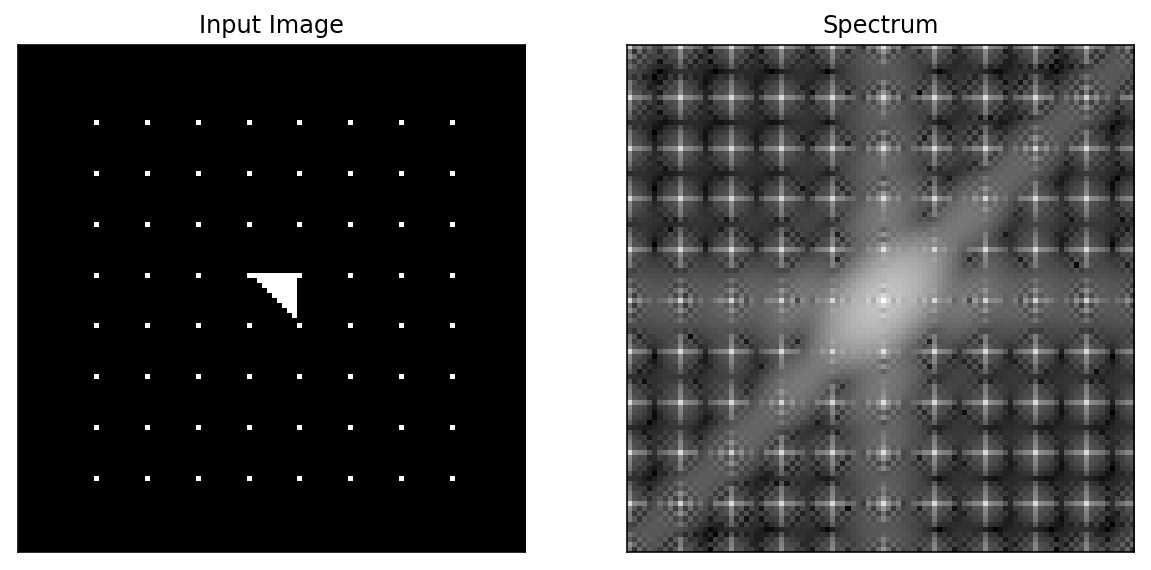

In [23]:
img = np.zeros((100,100))
for i in range(45,55):
    for j in range(45,i):
        img[i][j] = 1
for i in range(15,90,10):
    for j in range(15,90,10):
        img[i][j] = 1
img = np.array(img).transpose()
FFT(img)

# 空间滤波 Filter

In [1]:
import numpy as np
from scipy.fftpack import fftn,ifftn
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.simplefilter('ignore')

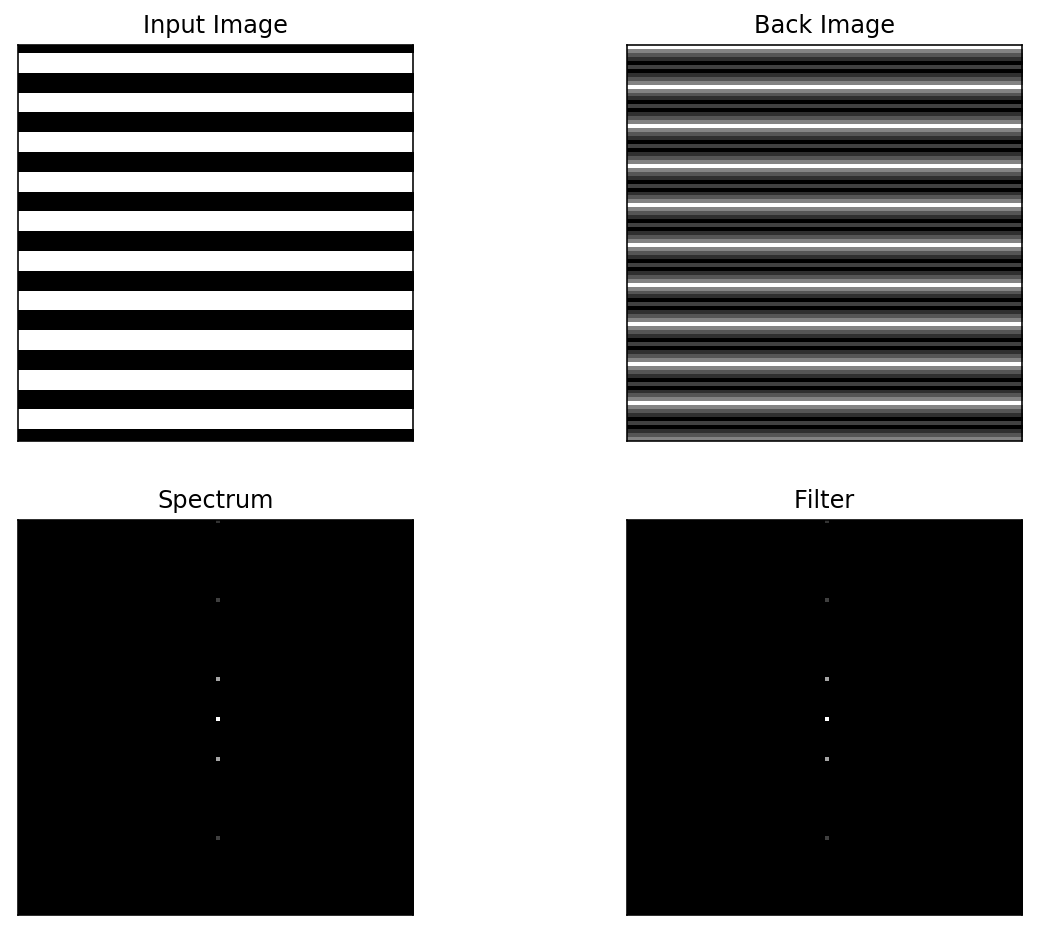

In [2]:
img = np.ones((100,100))
N = 10
for i in range(0,100,N):
    for j in range(-N//4,N//4):
        img[i+j] = [0]*100
fft_img = (abs(np.fft.fftshift(fftn(img))))
filter_img = fft_img.copy()
back_img = np.abs(ifftn(filter_img))

plt.figure(figsize=(10,8))
plt.subplot(221),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(fft_img, cmap = 'gray')
plt.title('Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(filter_img, cmap = 'gray')
plt.title('Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(back_img, cmap = 'gray')
plt.title('Back Image'), plt.xticks([]), plt.yticks([])
plt.show()

## 挡 0 级

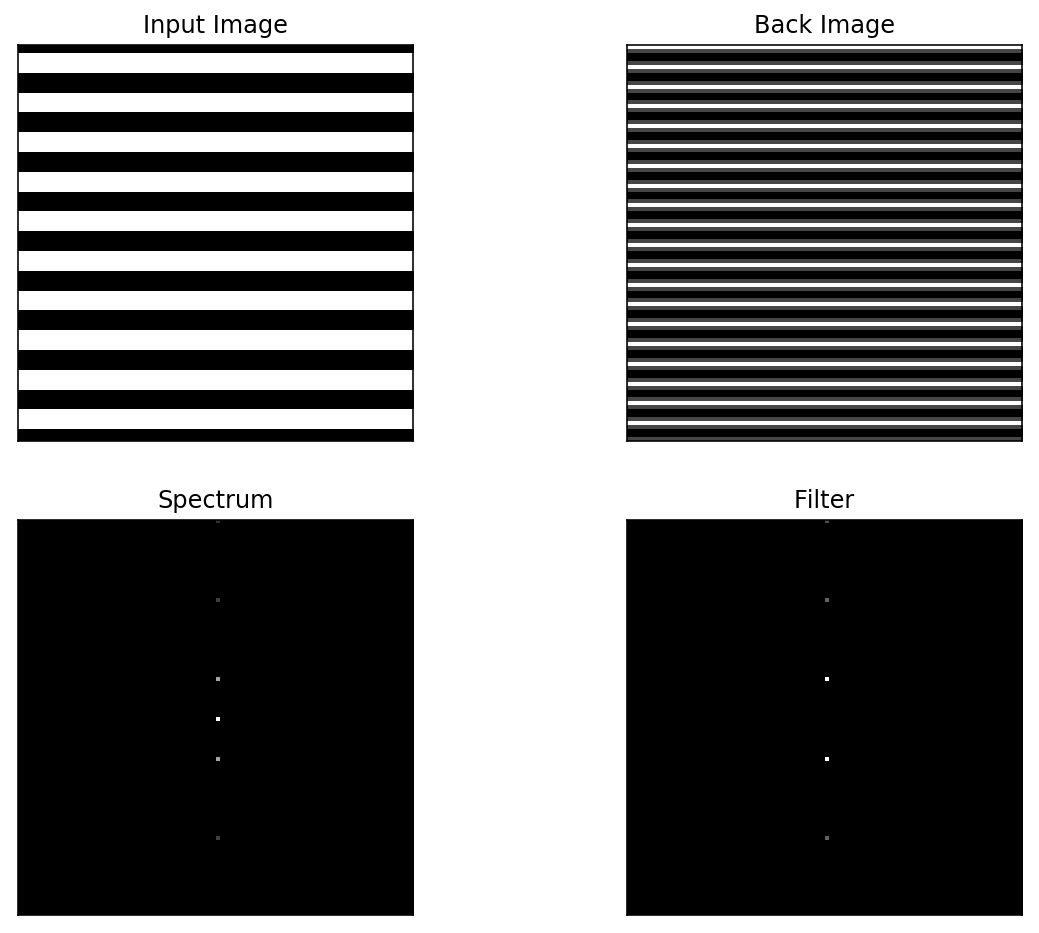

In [3]:
img = np.ones((100,100))
N = 10
for i in range(0,100,N):
    for j in range(-N//4,N//4):
        img[i+j] = [0]*100
fft_img = (abs(np.fft.fftshift(fftn(img))))
filter_img = fft_img.copy()
filter_img[50][50] = 0
back_img = np.abs(ifftn(filter_img))

plt.figure(figsize=(10,8))
plt.subplot(221),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(fft_img, cmap = 'gray')
plt.title('Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(filter_img, cmap = 'gray')
plt.title('Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(back_img, cmap = 'gray')
plt.title('Back Image'), plt.xticks([]), plt.yticks([])
plt.show()

## 挡 ±1 级

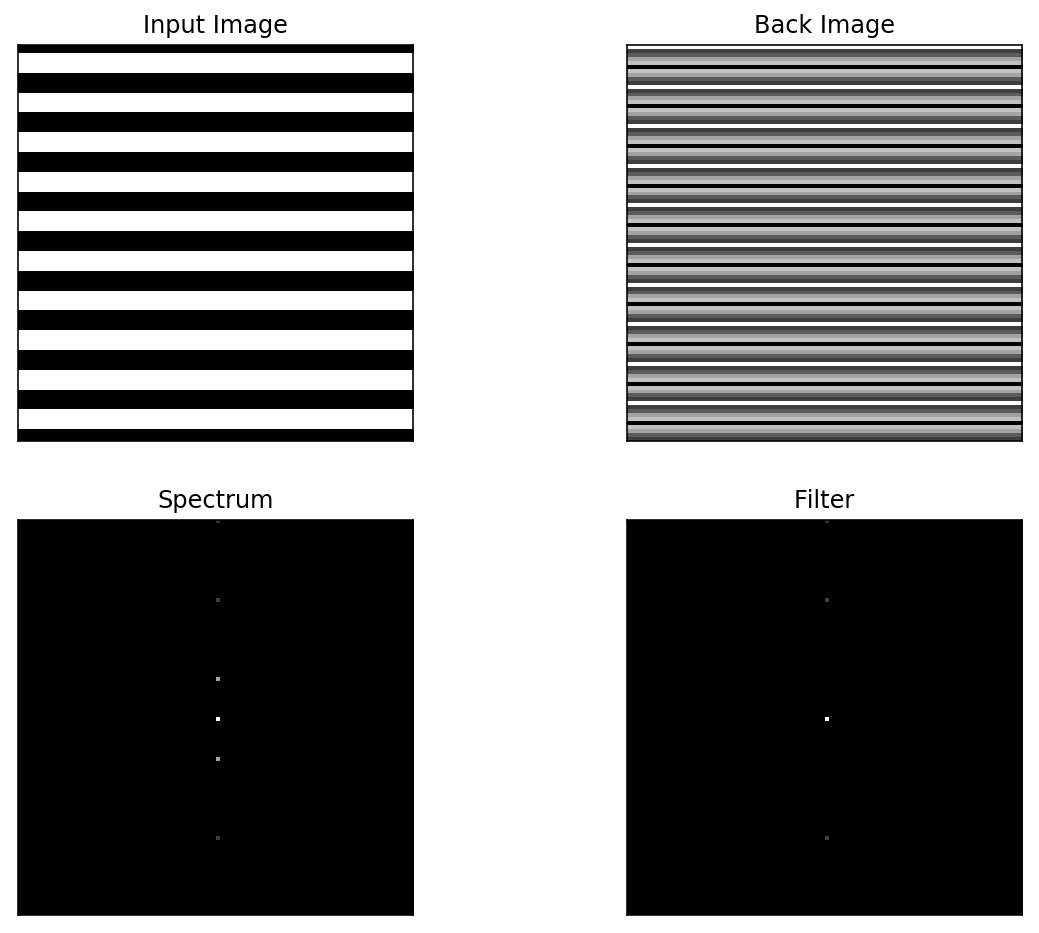

In [4]:
img = np.ones((100,100))
N = 10
for i in range(0,100,N):
    for j in range(-N//4,N//4):
        img[i+j] = [0]*100
fft_img = (abs(np.fft.fftshift(fftn(img))))
filter_img = fft_img.copy()
filter_img[40][50] = 0
filter_img[60][50] = 0
back_img = np.abs(ifftn(filter_img))

plt.figure(figsize=(10,8))
plt.subplot(221),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(fft_img, cmap = 'gray')
plt.title('Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(filter_img, cmap = 'gray')
plt.title('Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(back_img, cmap = 'gray')
plt.title('Back Image'), plt.xticks([]), plt.yticks([])
plt.show()

## 只让 0 级通过

均匀光场

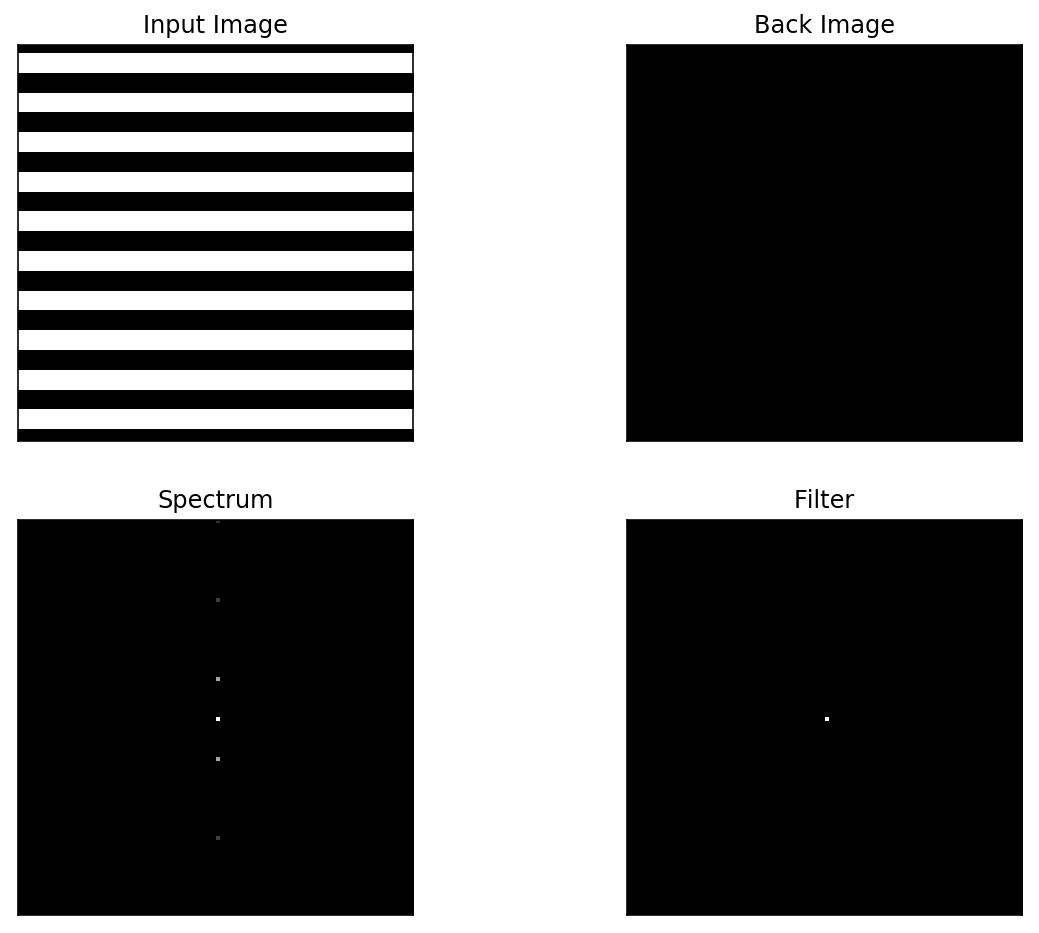

In [5]:
img = np.ones((100,100))
N = 10
for i in range(0,100,N):
    for j in range(-N//4,N//4):
        img[i+j] = [0]*100
fft_img = (abs(np.fft.fftshift(fftn(img))))
filter_img = np.zeros((100,100))
filter_img[50][50] = 1
back_img = np.abs(ifftn(filter_img))

plt.figure(figsize=(10,8))
plt.subplot(221),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(fft_img, cmap = 'gray')
plt.title('Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(filter_img, cmap = 'gray')
plt.title('Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(back_img, cmap = 'gray')
plt.title('Back Image'), plt.xticks([]), plt.yticks([])
plt.show()

## 只让 ±1 级通过

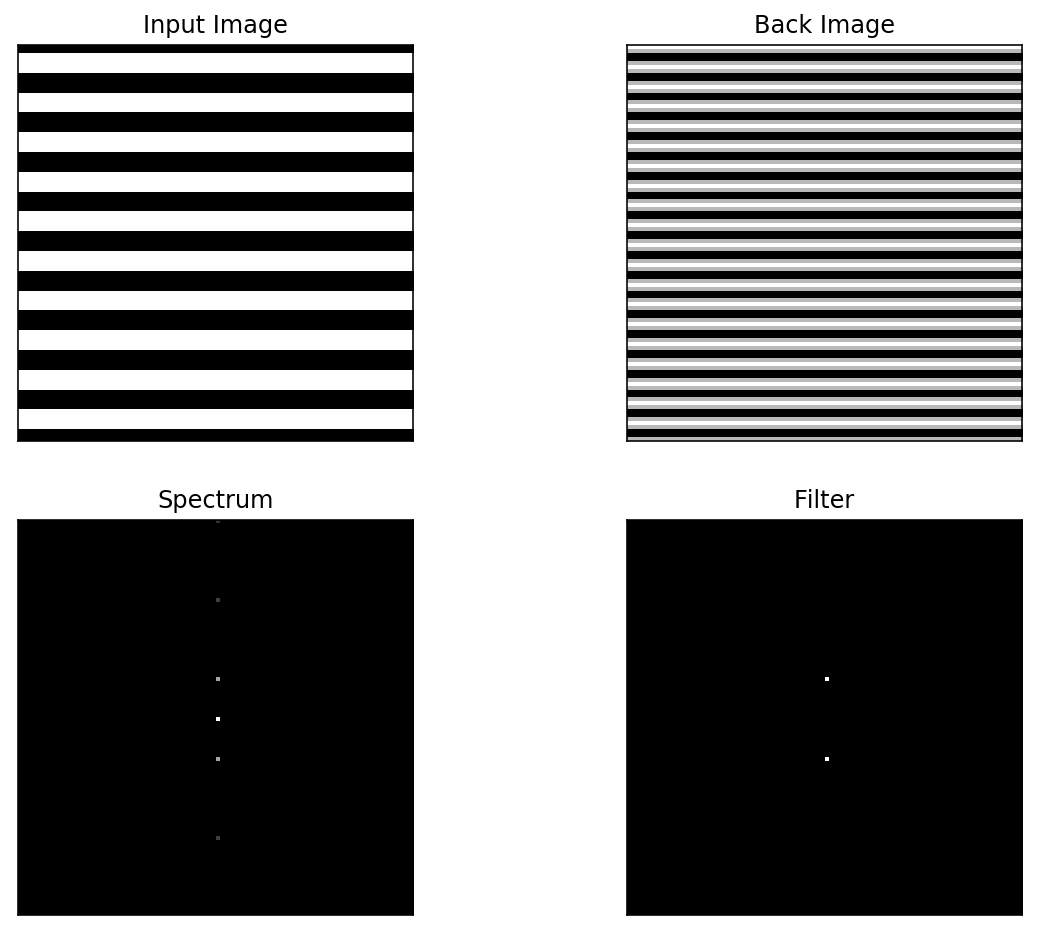

In [14]:
img = np.ones((100,100))
N = 10
for i in range(0,100,N):
    for j in range(-N//4,N//4):
        img[i+j] = [0]*100
fft_img = (abs(np.fft.fftshift(fftn(img))))
filter_img = np.zeros((100,100))
filter_img[40][50] = 1
filter_img[60][50] = 1
back_img = np.abs(ifftn(filter_img))

plt.figure(figsize=(10,8))
plt.subplot(221),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(fft_img, cmap = 'gray')
plt.title('Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(filter_img, cmap = 'gray')
plt.title('Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(back_img, cmap = 'gray')
plt.title('Back Image'), plt.xticks([]), plt.yticks([])
plt.show()